In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('Copy_of_00.csv',sep='\t')

In [3]:
df.head()

,detecttime,hash,status,region,reorg,replace,curblocknumber,failurereason,blockspending,timepending,...,network,type,maxpriorityfeepergas,maxfeepergas,basefeepergas,dropreason,rejectionreason,stuck,gasused,detect_date
0,2023-02-24T00:00:00.167Z,0x2b7cd2e8fd547f4ef784e6713a8c06926a0ff1ced45b...,pending,us-east-1,NaN,NaN,16694512,none,NaN,NaN,...,main,2,3.000000e+09,4.702304e+10,28122281784,NaN,NaN,False,-1.0,2023-02-24
1,2023-02-24T00:00:00.253Z,0x2b7cd2e8fd547f4ef784e6713a8c06926a0ff1ced45b...,pending,eu-central-1,NaN,NaN,16694512,none,NaN,NaN,...,main,2,3.000000e+09,4.702304e+10,28122281784,NaN,NaN,False,-1.0,2023-02-24
2,2023-02-24T00:00:00.280Z,0x2b7cd2e8fd547f4ef784e6713a8c06926a0ff1ced45b...,pending,ap-southeast-1,NaN,NaN,16694512,none,NaN,NaN,...,main,2,3.000000e+09,4.702304e+10,28122281784,NaN,NaN,False,-1.0,2023-02-24
3,2023-02-24T00:00:00.374Z,0x44bfc98df9a35e3cd4f144bba9e89afdb12122747dda...,pending,eu-central-1,NaN,NaN,16694512,none,NaN,NaN,...,main,2,1.000000e+09,4.604646e+10,28122281784,NaN,NaN,False,-1.0,2023-02-24
4,2023-02-24T00:00:00.383Z,0x44bfc98df9a35e3cd4f144bba9e89afdb12122747dda...,pending,us-east-1,NaN,NaN,16694512,none,NaN,NaN,...,main,2,1.000000e+09,4.604646e+10,28122281784,NaN,NaN,False,-1.0,2023-02-24


In [4]:
df.info()  # There are missing values and we need to drop reorg

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403212 entries, 0 to 403211
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   detecttime            403212 non-null  object 
 1   hash                  403212 non-null  object 
 2   status                403212 non-null  object 
 3   region                403212 non-null  object 
 4   reorg                 0 non-null       float64
 5   replace               4337 non-null    object 
 6   curblocknumber        403212 non-null  int64  
 7   failurereason         398612 non-null  object 
 8   blockspending         43946 non-null   float64
 9   timepending           43946 non-null   float64
 10  nonce                 403212 non-null  int64  
 11  gas                   403212 non-null  int64  
 12  gasprice              51753 non-null   float64
 13  value                 403212 non-null  object 
 14  toaddress             402823 non-null  object 
 15  

### EDAs

### missing values

<Axes: >

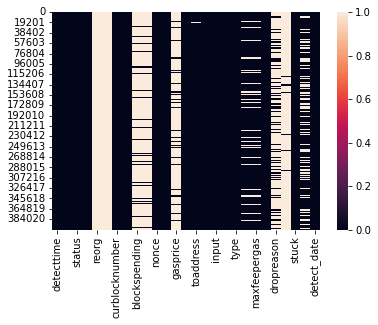

In [10]:
sns.heatmap(df.isnull())

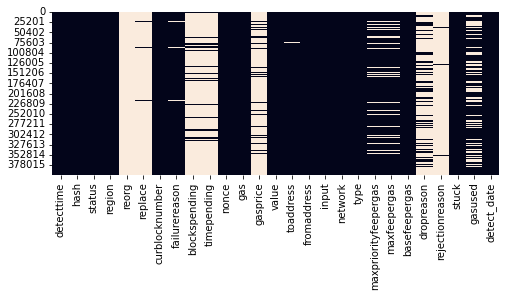

In [14]:
plt.figure(figsize=(8,3))
sns.heatmap(df.isnull(),cbar=False)
plt.show()

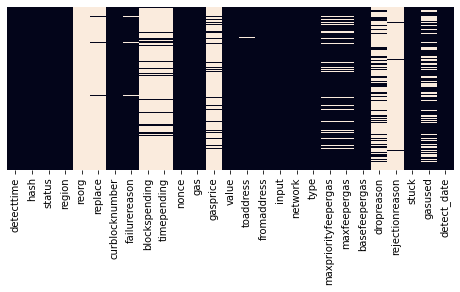

In [15]:
plt.figure(figsize=(8,3))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)
plt.show()

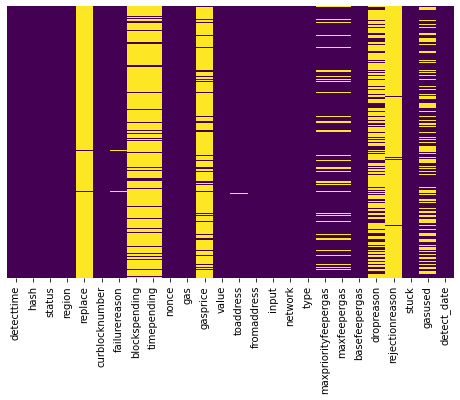

In [27]:
plt.figure(figsize=(8,5))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

**Remarks:** 
* ``reorg`` seems all missing, ``replace``,``blockpending``,``timepending``,``gaspirce``,``rejectionreason`` are
almost all missing (except  ``gasprice`` all other may need to be drop )
* ``dropreason``, ``gasused`` has many missing
* ``maxpriorityfeepergas``,``maxfeepergas`` has some missing
* ``failurereason`` has few missing

Below we are going to compute actuall percentate of missing values per column

### Percentage of Missing Values per Columnn

In [18]:
df.isnull().sum()/df.shape[0] # drop reorg,may be drop replace but keep rejectionreason

detecttime              0.000000
hash                    0.000000
status                  0.000000
region                  0.000000
reorg                   1.000000
replace                 0.989244
curblocknumber          0.000000
failurereason           0.011408
blockspending           0.891010
timepending             0.891010
nonce                   0.000000
gas                     0.000000
gasprice                0.871648
value                   0.000000
toaddress               0.000965
fromaddress             0.000000
input                   0.000000
network                 0.000000
type                    0.000000
maxpriorityfeepergas    0.128352
maxfeepergas            0.128352
basefeepergas           0.000000
dropreason              0.674082
rejectionreason         0.984063
stuck                   0.000000
gasused                 0.352611
detect_date             0.000000
dtype: float64

In [23]:
df['replace'].value_counts()

0x00948b8b760bfd488919a1a2ec65acdd54451c5770427256be0fc585f5b838ce    6
0x3f4fea9d1cdf398921368729a5e3398a919ab474d936189d9eab8e8ccc89dc3b    5
0x51565f06447a6de021c0e52df4cc00fd14548550f2f073e0aee83665c89cfa98    5
0xaa709ad043a06c77d0b75b06c6b2026b70b62191864d85a2da34d91c128aca38    5
0xc817cd26d71548ffe82b07789d22012646d2d83c10f3b450ea4b2c8a7917d440    5
                                                                     ..
0x0cf8510306769aa919c04530c0f748a27160a92597f59cab2997205ece581f95    1
0x60ec64e8e4d901ba94aca4760c3e6b774be0ba48d2c333d7bc4dbd30bb2fded3    1
0xb5e0037936c989b76b69d5f2f64413ced48b42c8ac53f954df8bf9f99e1518a7    1
0x4bd85c64b1294d900f0a4487532a415e1076ed42230981ec085b82eb17cda1c0    1
0x2724651c0aaec364e3726de9fa81f3c5aa6e776016e3da77bbc402d8fe48ab39    1
Name: replace, Length: 1562, dtype: int64

In [20]:
df['rejectionreason'].value_counts()

nonce too low                                 4710
transaction underpriced                       1049
replacement transaction underpriced            553
insufficient funds for gas * price + value     114
Name: rejectionreason, dtype: int64

### Drop reorg columns with 100% missing

In [24]:
df.drop('reorg',axis=1,inplace=True)

In [25]:
df.head()

,detecttime,hash,status,region,replace,curblocknumber,failurereason,blockspending,timepending,nonce,...,network,type,maxpriorityfeepergas,maxfeepergas,basefeepergas,dropreason,rejectionreason,stuck,gasused,detect_date
0,2023-02-24T00:00:00.167Z,0x2b7cd2e8fd547f4ef784e6713a8c06926a0ff1ced45b...,pending,us-east-1,NaN,16694512,none,NaN,NaN,191,...,main,2,3.000000e+09,4.702304e+10,28122281784,NaN,NaN,False,-1.0,2023-02-24
1,2023-02-24T00:00:00.253Z,0x2b7cd2e8fd547f4ef784e6713a8c06926a0ff1ced45b...,pending,eu-central-1,NaN,16694512,none,NaN,NaN,191,...,main,2,3.000000e+09,4.702304e+10,28122281784,NaN,NaN,False,-1.0,2023-02-24
2,2023-02-24T00:00:00.280Z,0x2b7cd2e8fd547f4ef784e6713a8c06926a0ff1ced45b...,pending,ap-southeast-1,NaN,16694512,none,NaN,NaN,191,...,main,2,3.000000e+09,4.702304e+10,28122281784,NaN,NaN,False,-1.0,2023-02-24
3,2023-02-24T00:00:00.374Z,0x44bfc98df9a35e3cd4f144bba9e89afdb12122747dda...,pending,eu-central-1,NaN,16694512,none,NaN,NaN,338335,...,main,2,1.000000e+09,4.604646e+10,28122281784,NaN,NaN,False,-1.0,2023-02-24
4,2023-02-24T00:00:00.383Z,0x44bfc98df9a35e3cd4f144bba9e89afdb12122747dda...,pending,us-east-1,NaN,16694512,none,NaN,NaN,338335,...,main,2,1.000000e+09,4.604646e+10,28122281784,NaN,NaN,False,-1.0,2023-02-24


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403212 entries, 0 to 403211
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   detecttime            403212 non-null  object 
 1   hash                  403212 non-null  object 
 2   status                403212 non-null  object 
 3   region                403212 non-null  object 
 4   replace               4337 non-null    object 
 5   curblocknumber        403212 non-null  int64  
 6   failurereason         398612 non-null  object 
 7   blockspending         43946 non-null   float64
 8   timepending           43946 non-null   float64
 9   nonce                 403212 non-null  int64  
 10  gas                   403212 non-null  int64  
 11  gasprice              51753 non-null   float64
 12  value                 403212 non-null  object 
 13  toaddress             402823 non-null  object 
 14  fromaddress           403212 non-null  object 
 15  

### Univariate: Categorical Variables

In [ ]:
sns.set_style(style='darkgrid')

In [72]:
df['detecttime'].value_counts()

2023-02-24T00:01:36.602Z    392
2023-02-24T00:01:37.224Z    392
2023-02-24T00:01:36.164Z    392
2023-02-24T00:26:36.590Z    325
2023-02-24T00:26:37.004Z    325
                           ... 
2023-02-24T00:22:40.418Z      1
2023-02-24T00:22:40.416Z      1
2023-02-24T00:22:40.414Z      1
2023-02-24T00:22:40.263Z      1
2023-02-24T00:59:59.915Z      1
Name: detecttime, Length: 156518, dtype: int64

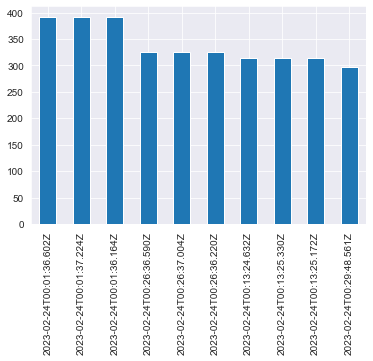

In [73]:
df['detecttime'].value_counts()[:10].plot(kind='bar')
plt.show()

In [70]:
df['hash'].value_counts()

0x5ff624d76fbb1a847e1302d0e99c509517e4534605e57d79a7635e52fe8527d2    14
0x2a35d4122194acb0016bc142efb66cb20bc9f88437d7726daaf71f204b4cbfae    13
0x9a5f444db6cf33f10b0bb8d213c604bfacd21dbb06e4674062548197c86a6cc9    13
0x09a469e26fd65388f2d2fe06101be33d2ab35d001b17ae22a5c3900b3b9b1215    13
0xfc8e7550fe373079af68a1350955b677be245bb3adbd7f9b9d7073c3ec5231f4    13
                                                                      ..
0x82561f3cebea733f99b6990d4039f3db5b1b2dcffb3a3d9feb8abe2f118101b3     1
0x113a5a38e2f8e4cbdf90ec7ae4e2036e27838c5e6e9a5fe15be340046987716f     1
0x99649b00e2de58388f22c6f91cc8893fb06e9b7eb84d4c3ce68e2afe5e6273b6     1
0x4547facaf76872ea982d5597fe0d94b93d37e9e806b8edf665d1f19b28e6fe5a     1
0xa78c73fb9d9161e37728a3698cf9f2c33ab89bee840f10465995c044b910aa3f     1
Name: hash, Length: 46505, dtype: int64

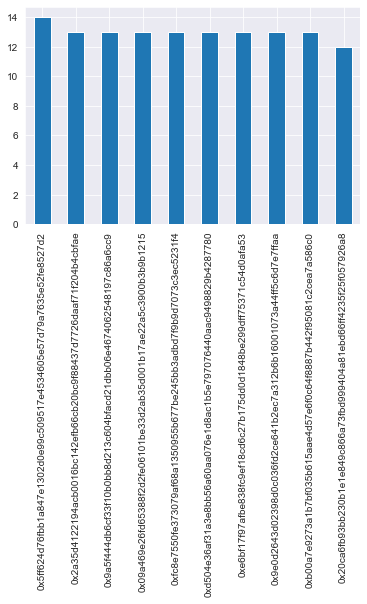

In [71]:
df['hash'].value_counts()[:10].plot(kind='bar')
plt.show()

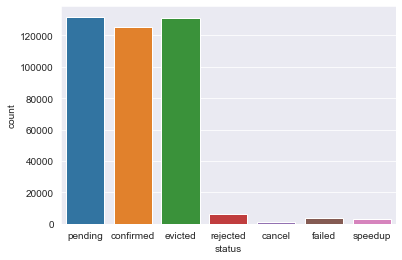

In [32]:
sns.countplot(x='status',data=df) 
plt.show()

most transactions are ``pending``,``evicted`` or ``confirm``(**Explain all status**)

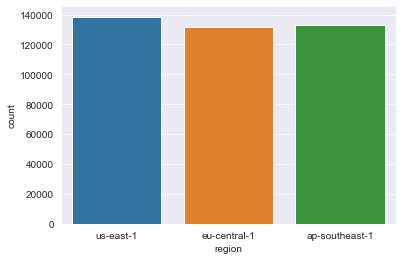

In [33]:
sns.countplot(x='region',data=df) 
plt.show()

All transactions are either from US, Europe AP-Southeast(**Asian Pacific? Which are countries are in**)

In [38]:
df['failurereason'].value_counts()

none                                                                    395225
Reverted: \Reason not specified\""                                        1005
Reverted: \Max supply exceeded!\""                                         981
Reverted: \Address already claimed!\""                                     234
Out of gas                                                                 150
                                                                         ...  
Reverted: \Bifrost::completeTransfer: transfer must be initiated!\""         3
Reverted: \Pausable: paused\""                                               3
Reverted: \MultiplexFeature::_multiplexBatchSell/UNDERBOUGHT\""              3
Reverted: \Insufficient balance\""                                           3
Reverted: \withdraw: not good\""                                             3
Name: failurereason, Length: 85, dtype: int64

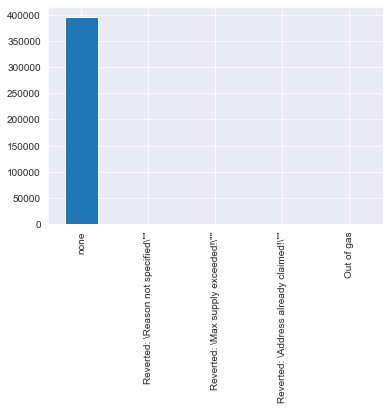

In [43]:
df['failurereason'].value_counts()[:5].plot(kind='bar')
plt.show()

In [44]:
df['failurereason'].value_counts()[:5]

none                                      395225
Reverted: \Reason not specified\""          1005
Reverted: \Max supply exceeded!\""           981
Reverted: \Address already claimed!\""       234
Out of gas                                   150
Name: failurereason, dtype: int64

Almost all transaction failure reason is ``none`` (**What does this mean?**)

In [45]:
df['value'].value_counts()

0                      223925
777000000000000         22687
50000000000000000        5154
10000000000000000        3476
100000000000000000       2862
                        ...  
48638125000934              1
140848000000000             1
2916128000000000000         1
2039000000000000            1
17896890000000000           1
Name: value, Length: 9897, dtype: int64

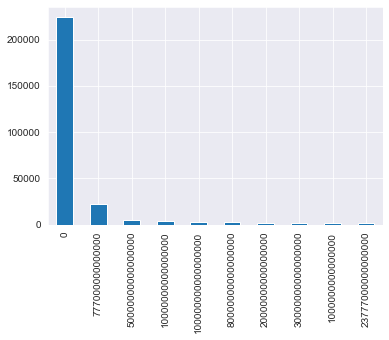

In [47]:
df['value'].value_counts()[:10].plot(kind='bar')
plt.show()

Most values are 0

In [48]:
df['toaddress'].value_counts()[:5]

0x0394d949eb580dd147975d8d7d857339bba09fa2    42459
0xdac17f958d2ee523a2206206994597c13d831ec7    25904
0xd4307e0acd12cf46fd6cf93bc264f5d5d1598792    24303
0xef1c6e67703c7bd7107eed8303fbe6ec2554bf6b    14809
0x00000000006c3852cbef3e08e8df289169ede581    13406
Name: toaddress, dtype: int64

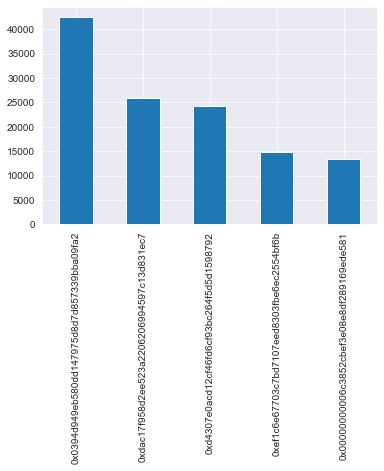

In [55]:
df['toaddress'].value_counts()[:5].plot(kind='bar')
plt.show()

In [58]:
40000/df.shape[0]

0.09920339672430384

The transaction are send to mostly few address and almost 10% of the most common address

In [50]:
df['fromaddress'].value_counts()

0xab97925eb84fe0260779f58b7cb08d77dcb1ee2b    7439
0xa152f8bb749c55e9943a3a0a3111d18ee2b3f94e    4091
0x46340b20830761efd32832a74d7169b29feb9758    3081
0x21a31ee1afc51d94c2efccaa2092ad1028285549    2648
0x28c6c06298d514db089934071355e5743bf21d60    2633
                                              ... 
0x1b33b9365d9a2669e1c77e26ef68aa2766c3670a       1
0x0d5ef4ee77cd7c55de4a2d2f6b6745027ef5624d       1
0xc1916065d6a1bb5124d26170d2aba92460985410       1
0x86a5922babfcee50c52f8e65d35610381ce4a542       1
0x7e5c499a797c947f1ef047fc227ccdd313541b7d       1
Name: fromaddress, Length: 23974, dtype: int64

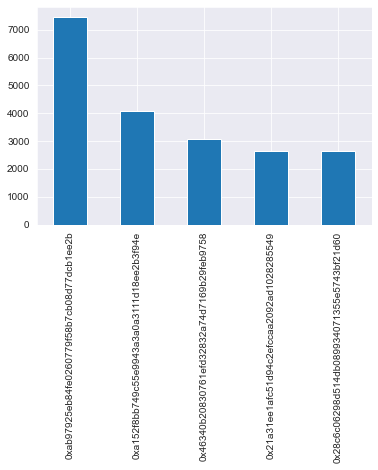

In [57]:
df['fromaddress'].value_counts()[:5].plot(kind='bar')
plt.show()

The transactions come from much diverse addresses

In [53]:
df['input'].value_counts()[:5]

0x                                                                                                                                            106298
0xa0712d680000000000000000000000000000000000000000000000000000000000000001                                                                     28156
0xefef39a10000000000000000000000000000000000000000000000000000000000000001                                                                     23891
0xa22cb4650000000000000000000000001e0049783f008a0085193e00003d00cd54003c710000000000000000000000000000000000000000000000000000000000000001     11156
0xa0712d680000000000000000000000000000000000000000000000000000000000000001856efd2e                                                              6256
Name: input, dtype: int64

In [52]:
df['network'].value_counts()  # all transaction are on the main network 

main    403212
Name: network, dtype: int64

This variable ``network`` should not be include in analysis since it takes a single value

In [61]:
df['dropreason'].value_counts()

low-nonce-txs       124966
replaced-txs          4210
truncating-txs         839
account-cap-txs        618
underpriced-txs        505
unpayable-txs          132
unexecutable-txs       123
old-txs                 21
Name: dropreason, dtype: int64

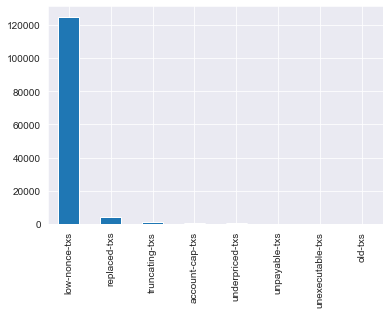

In [62]:
df['dropreason'].value_counts().plot(kind='bar')
plt.show()

Most common reason is ``low-nonce-txs`` (**What does this mean?**)

In [63]:
df['rejectionreason'].value_counts()

nonce too low                                 4710
transaction underpriced                       1049
replacement transaction underpriced            553
insufficient funds for gas * price + value     114
Name: rejectionreason, dtype: int64

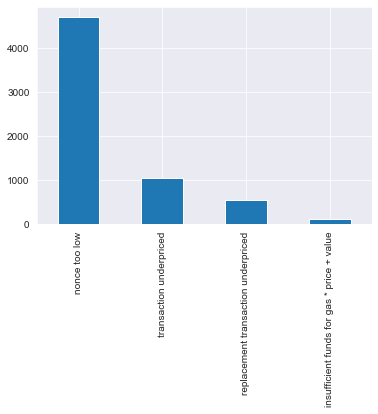

In [66]:
df['rejectionreason'].value_counts().plot(kind='bar')
plt.show()

Most common rejection reason is ``nonce too low``(**What does that mean**)

In [67]:
df['stuck'].value_counts() 

False    403212
Name: stuck, dtype: int64

Only one value so ``stuck`` should not included in any analysis .

### Univariate: Continuous Variables

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403212 entries, 0 to 403211
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   detecttime            403212 non-null  object 
 1   hash                  403212 non-null  object 
 2   status                403212 non-null  object 
 3   region                403212 non-null  object 
 4   replace               4337 non-null    object 
 5   curblocknumber        403212 non-null  int64  
 6   failurereason         398612 non-null  object 
 7   blockspending         43946 non-null   float64
 8   timepending           43946 non-null   float64
 9   nonce                 403212 non-null  int64  
 10  gas                   403212 non-null  int64  
 11  gasprice              51753 non-null   float64
 12  value                 403212 non-null  object 
 13  toaddress             402823 non-null  object 
 14  fromaddress           403212 non-null  object 
 15  

<Axes: xlabel='curblocknumber', ylabel='Count'>

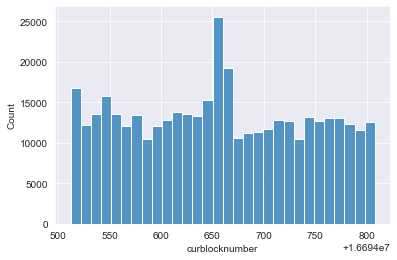

In [76]:
sns.histplot(df['curblocknumber'].dropna(),bins=30)

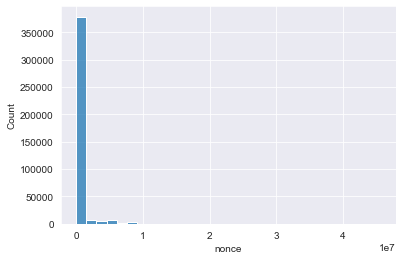

In [82]:
sns.histplot(df['nonce'].dropna(),bins=30)
plt.show()

C:\Users\matar\anaconda3\envs\mlcourse2023\Lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


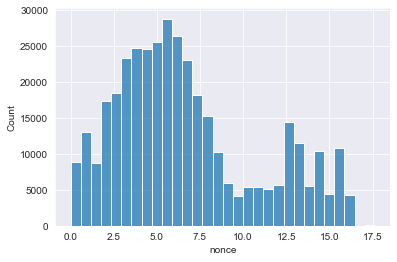

In [83]:
sns.histplot(np.log(df['nonce'].dropna()),bins=30)
plt.show()

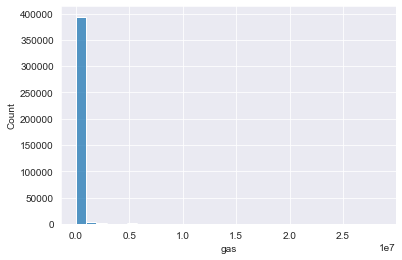

In [84]:
sns.histplot(df['gas'].dropna(),bins=30)
plt.show()

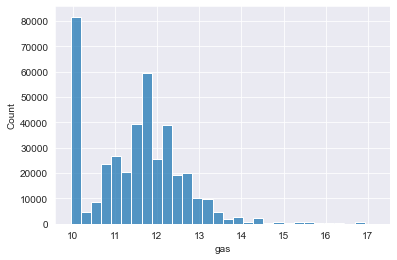

In [85]:
sns.histplot(np.log(df['gas'].dropna()),bins=30)
plt.show()

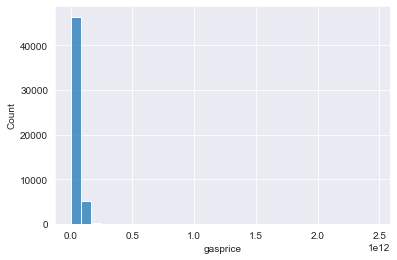

In [86]:
sns.histplot(df['gasprice'].dropna(),bins=30)
plt.show()

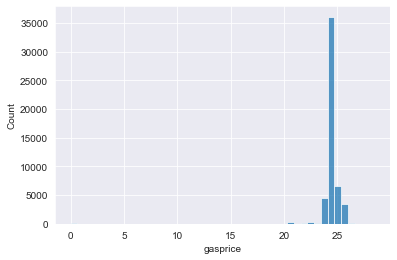

In [90]:
sns.histplot(np.log(df['gasprice'].dropna()),bins=45)
plt.show()

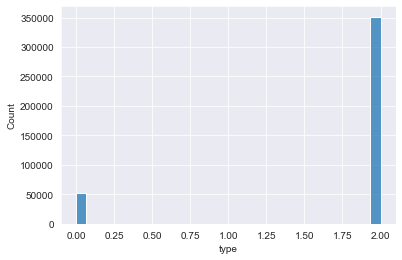

In [91]:
sns.histplot(df['type'].dropna(),bins=30)
plt.show()

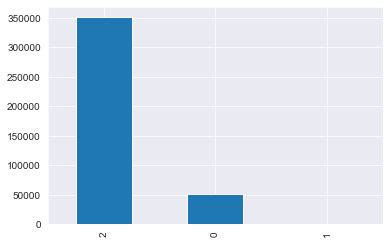

In [92]:
df['type'].value_counts().plot(kind='bar')
plt.show()

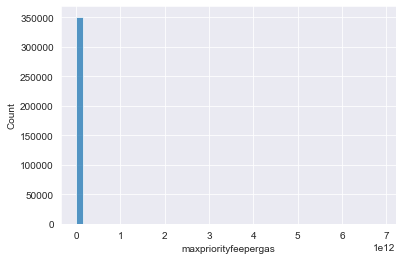

In [94]:
sns.histplot(df['maxpriorityfeepergas'].dropna(),bins=45)
plt.show()

C:\Users\matar\anaconda3\envs\mlcourse2023\Lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


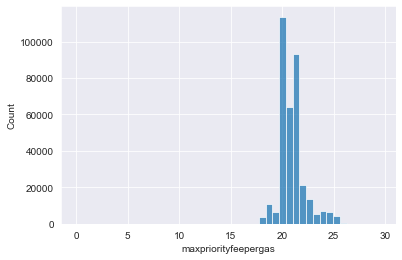

In [93]:
sns.histplot(np.log(df['maxpriorityfeepergas'].dropna()),bins=45)
plt.show()

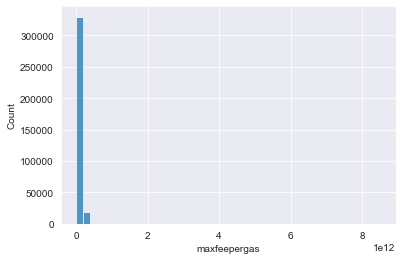

In [95]:
sns.histplot(df['maxfeepergas'].dropna(),bins=45)
plt.show()

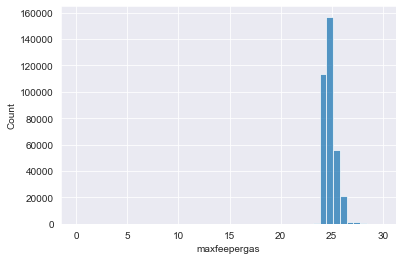

In [96]:
sns.histplot(np.log(df['maxfeepergas'].dropna()),bins=45)
plt.show()

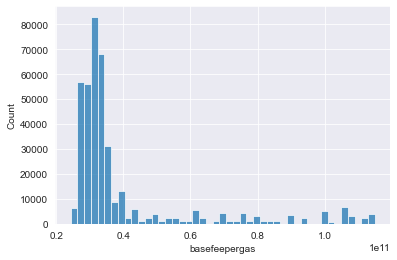

In [97]:
sns.histplot(df['basefeepergas'].dropna(),bins=45)
plt.show()

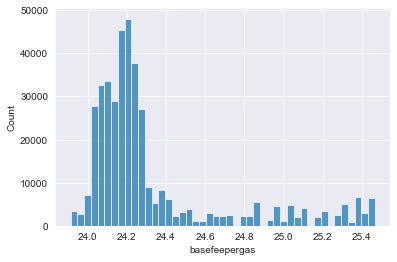

In [98]:
sns.histplot(np.log(df['basefeepergas'].dropna()),bins=45)
plt.show()

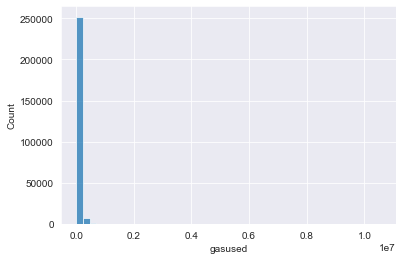

In [99]:
sns.histplot(df['gasused'].dropna(),bins=45)
plt.show()

C:\Users\matar\anaconda3\envs\mlcourse2023\Lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


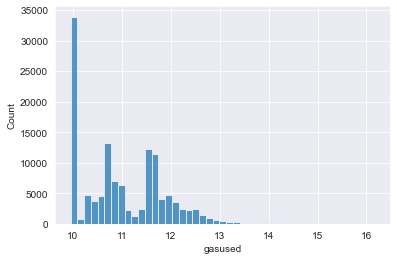

In [100]:
sns.histplot(np.log(df['gasused'].dropna()),bins=45)
plt.show()

# Bivariate Plots

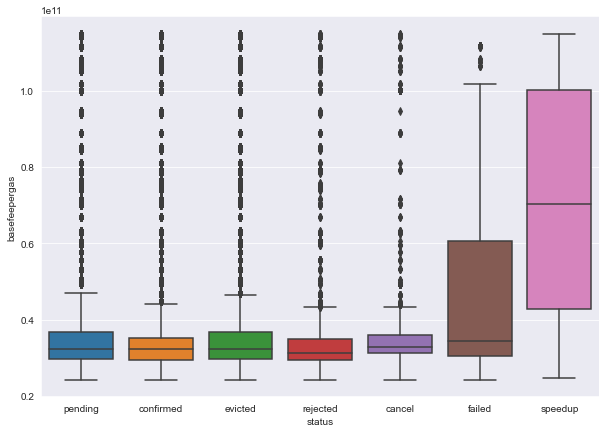

In [106]:
plt.figure(figsize=(10,7))
sns.boxplot(x='status',y='basefeepergas',data=df)
plt.show()

**Comments on this. See speedup and failed has high basefeepergas and there are many outliers in the other cases. Explain**

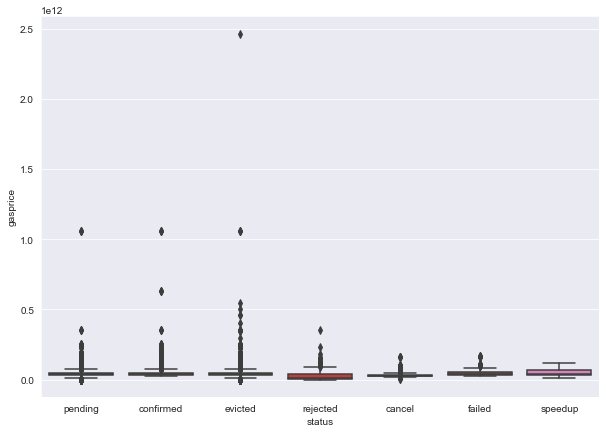

In [107]:
plt.figure(figsize=(10,7))
sns.boxplot(x='status',y='gasprice',data=df)
plt.show()

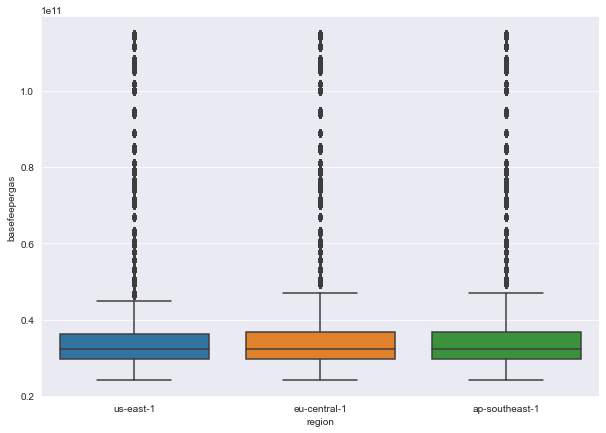

In [108]:
plt.figure(figsize=(10,7))
sns.boxplot(x='region',y='basefeepergas',data=df)
plt.show()

Make sense, region does not matter.

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403212 entries, 0 to 403211
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   detecttime            403212 non-null  object 
 1   hash                  403212 non-null  object 
 2   status                403212 non-null  object 
 3   region                403212 non-null  object 
 4   replace               4337 non-null    object 
 5   curblocknumber        403212 non-null  int64  
 6   failurereason         398612 non-null  object 
 7   blockspending         43946 non-null   float64
 8   timepending           43946 non-null   float64
 9   nonce                 403212 non-null  int64  
 10  gas                   403212 non-null  int64  
 11  gasprice              51753 non-null   float64
 12  value                 403212 non-null  object 
 13  toaddress             402823 non-null  object 
 14  fromaddress           403212 non-null  object 
 15  

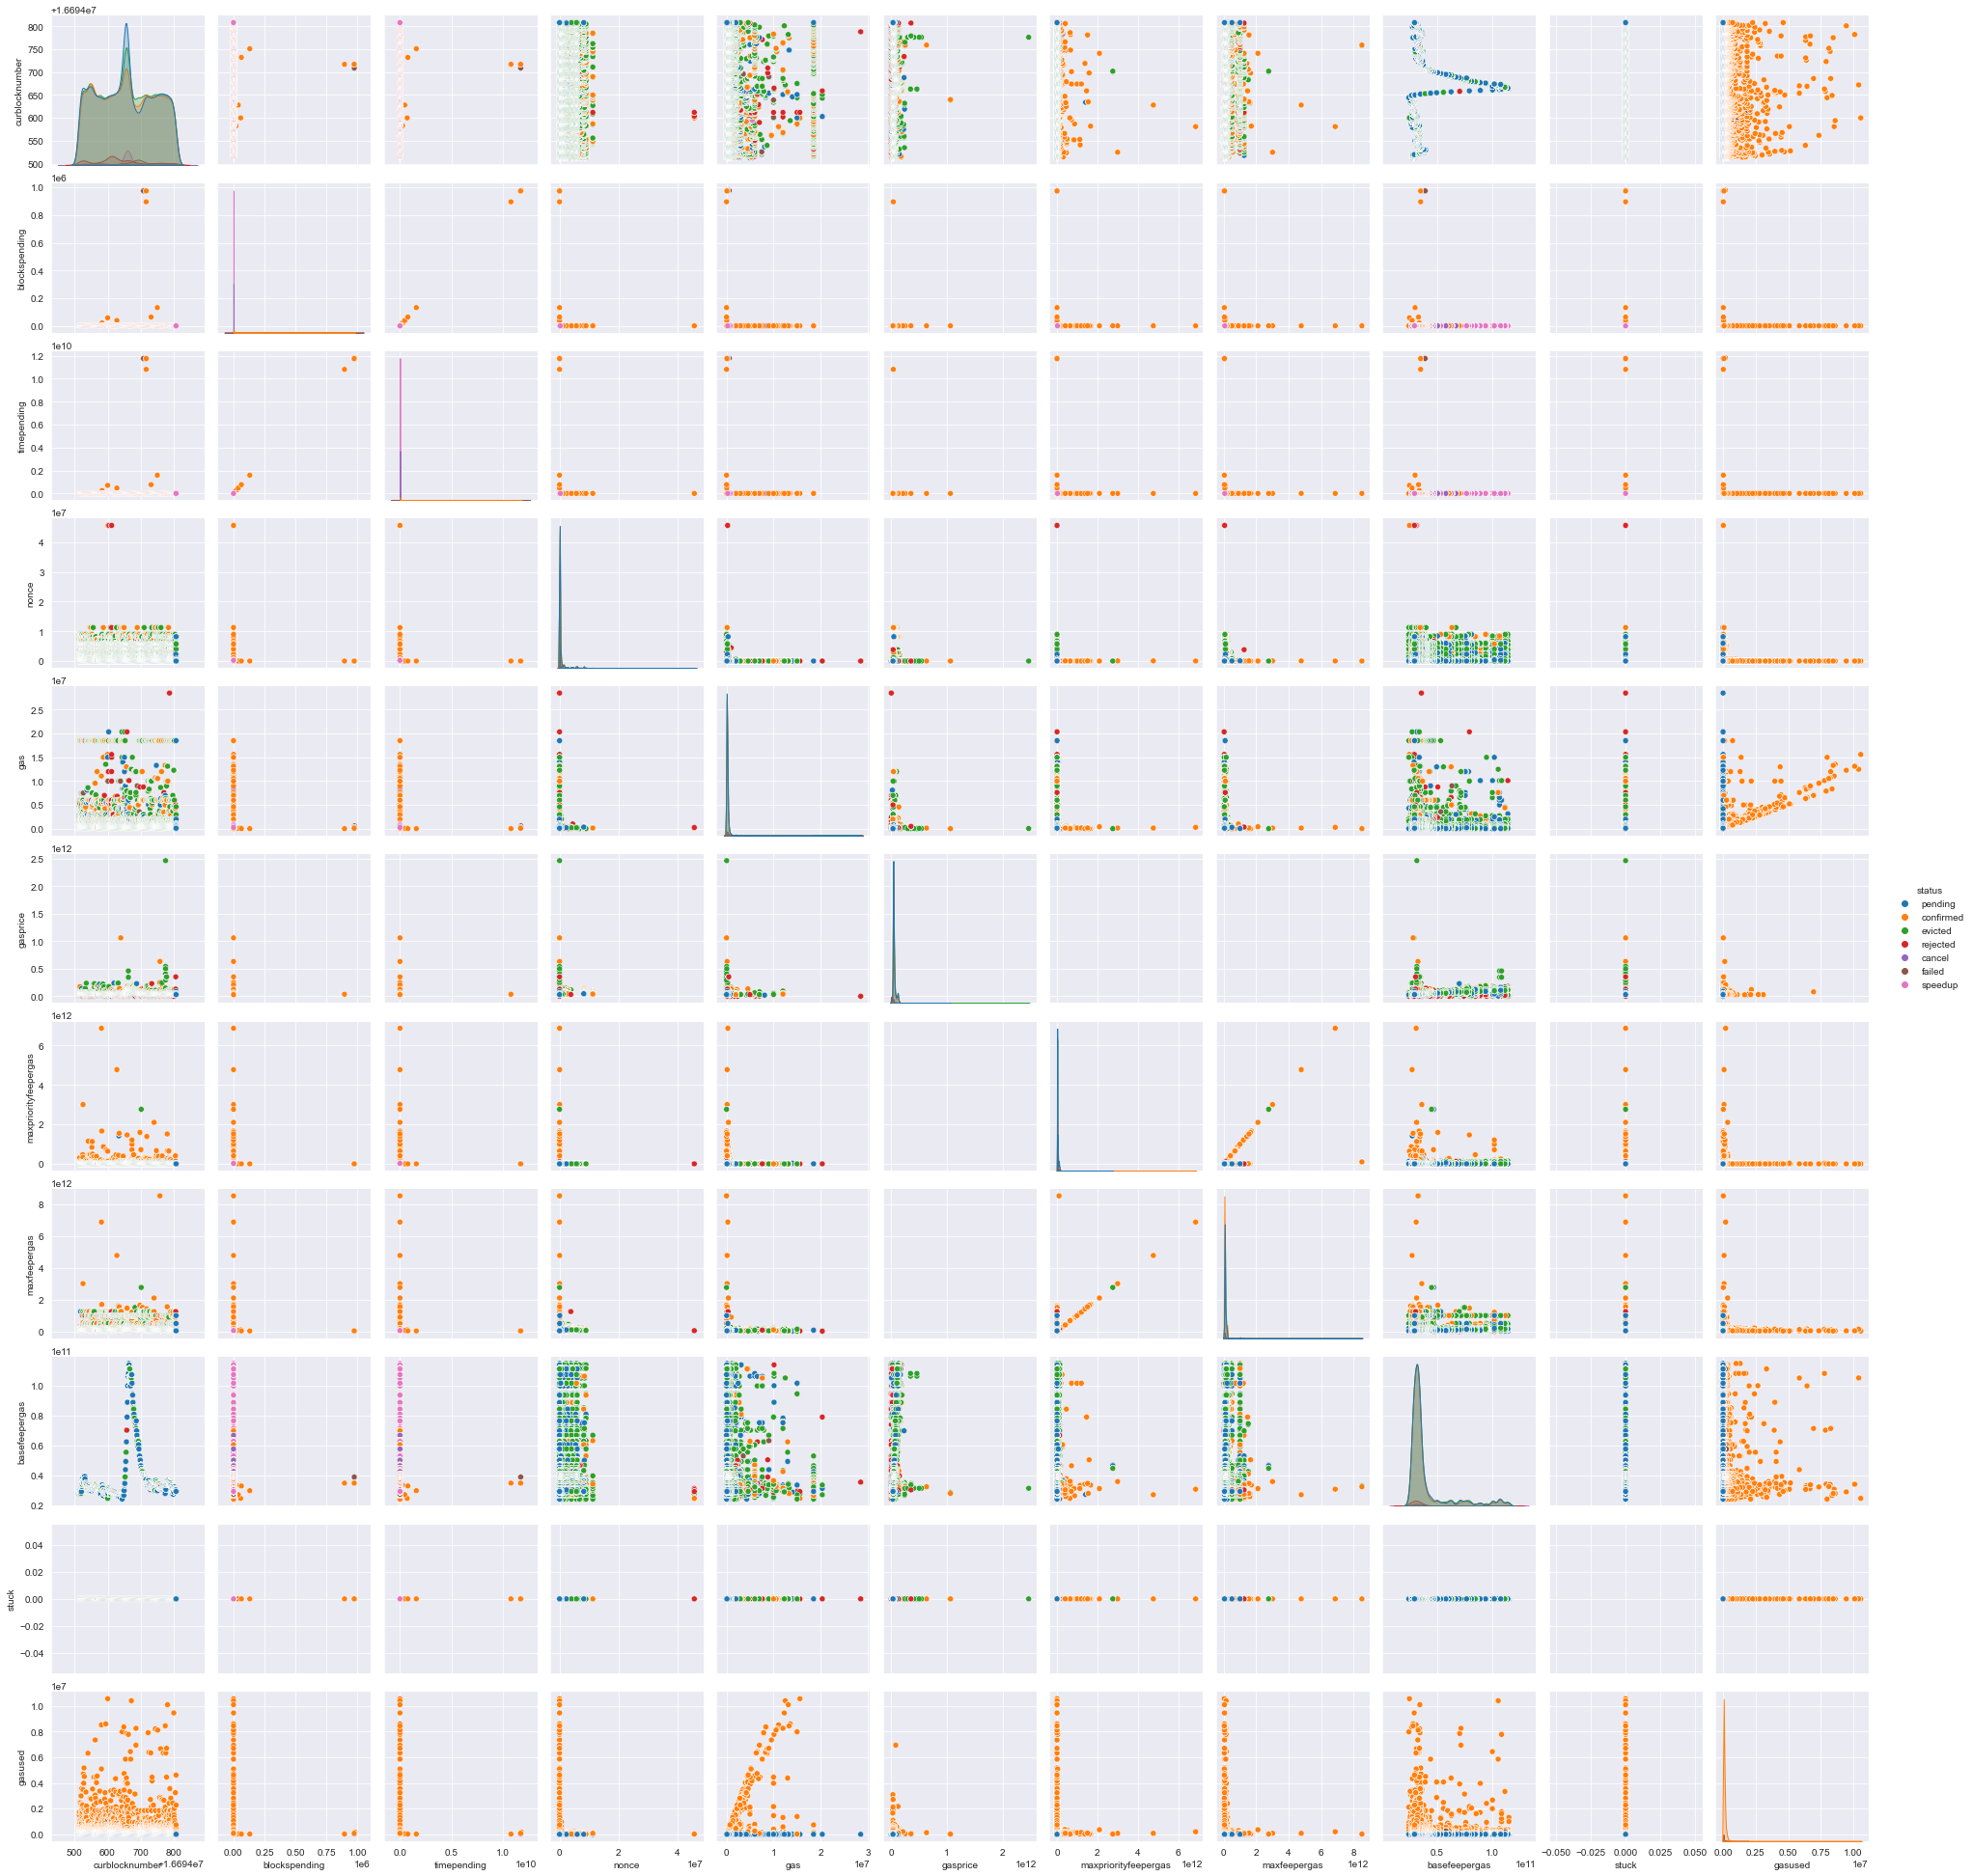

In [110]:
sns.pairplot(df.drop('type',axis=1),hue='status')

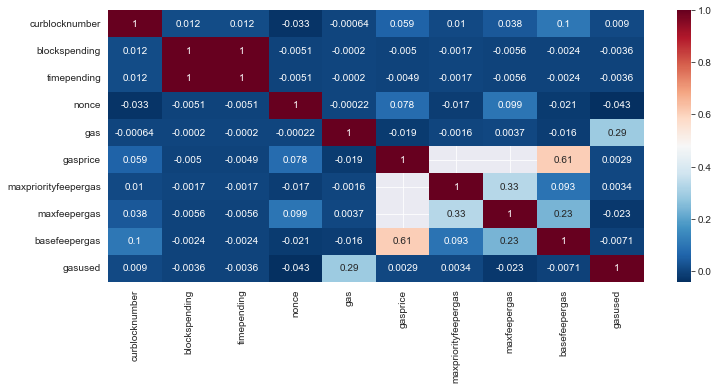

In [124]:
plt.figure(figsize=(12,5))
sns.heatmap(df.drop(['stuck','type'],axis=1).corr(numeric_only=True),yticklabels=True,cbar=True,cmap='RdBu_r',annot=True)
plt.show()
# 'RdBu_r', 'BrBG_r', & PuOr_r are other good diverging colormaps or 'viridis'


**Numerical are at best moderatley correlated (linear correlation here) expect from the obviously correlated ones.**